## Single Value

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import scipy 
scipy.__version__
import scipy.stats as stats

In [2]:
df_TOCC = pd.read_csv('../../datasets/TypeOfContractChannel.csv')
df_TOCC[:3]

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0
2,66756657,렌탈,Normal,홈쇼핑/방송,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,8.0,우리은행,정상,60.0,2363.0


### y : 연속형
    - 단일 변수의 정규성 여부 판단 필
        - 여기도 가설을 세우고 판단함.
        - 검증 개수 따른 방법 선택
                - 5000 이하: shapiro normality test
                - 5000 이상: anderson normality test

#### anderson: 주어진 데이터가 정규분포를 따르는지 확인하는 통계적 검정 방법
        - 데이터와 정규분포 사이의 거리를 측정하여 정규성 판단. 
        = 검정 통계량은 표본 데이터와 정규 분포 간의 차이를 나타냄. 
#### shapiro : 주어진 데이터가 정규 분포를 따르는지 평가하는 통계 방법. 
        - 데이터의 값들을 작은값부터 큰 값 순서대로 정렬한 후, 이 순서대로 예상되는 정규 분포의 분위수를 계산. 
#### 차이? 
    - 통계량의 계산방식과 검정 결과 해석. 
    

#### 선정변수 
        1. 'age'(연속)
            → 분석 내용: 나이가 정규분포를 따르는가?
                - 귀무가설: 나이가 정규분포이다. 
                - 대립가설: 나이가 정규분포가 아니다.
            → 분석 결론 (p-value : 0.05?)
                - 통계 결론: 81.5 > 0.78 , p-value 0.05 =  대립가설 참
                - 사실 결론: 나이가 정규분포가 아니다. 

- 1. age에 대해 시각화
- 2. age에 대해 p-value

In [3]:
df_age = df_TOCC['age']
df_age

0        43.0
1        62.0
2        60.0
3        60.0
4        51.0
         ... 
51299     NaN
51300    39.0
51301    51.0
51302    64.0
51303    53.0
Name: age, Length: 51304, dtype: float64

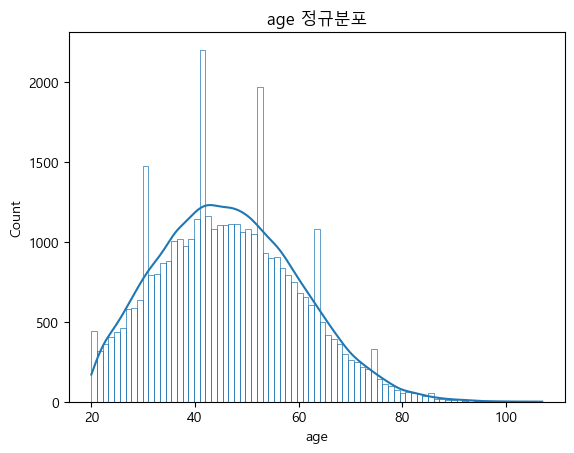

In [4]:
sns.histplot(data=df_TOCC, x='age', kde=True, fill=False)
plt.title('age 정규분포')
plt.show()

In [5]:
df_TOCC_age=df_TOCC['age'].dropna()

In [6]:
df_TOCC_age.count()

40509

In [7]:
stats.anderson(df_TOCC_age)

AndersonResult(statistic=81.5597210112901, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=46.60828457873559, scale=13.46597687950048)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [11]:
## s < cv :정규분포, s > cv : 비정규분포
s, cv, sl = stats.anderson(df_TOCC_age)
s, cv, sl

(81.5597210112901,
 array([0.576, 0.656, 0.787, 0.918, 1.092]),
 array([15. , 10. ,  5. ,  2.5,  1. ]))

#### 선정변수 
        1. 'Mileage'(연속)
            → 분석 내용: 마일리지가 정규 분포를 따르는가?
                - 귀무가설: 마일리지는 정규분포이다. 
                - 대립가설: 마일리지는 정규분포가 아니다.
            → 분석 결론 (p-value : 0.05?)
                - 통계 결론:
                - 사실 결론: 

In [12]:
df_TOCC_dropna=df_TOCC.dropna()[:500]
df_TOCC_dropna[:2]

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0


<Axes: xlabel='Mileage', ylabel='Count'>

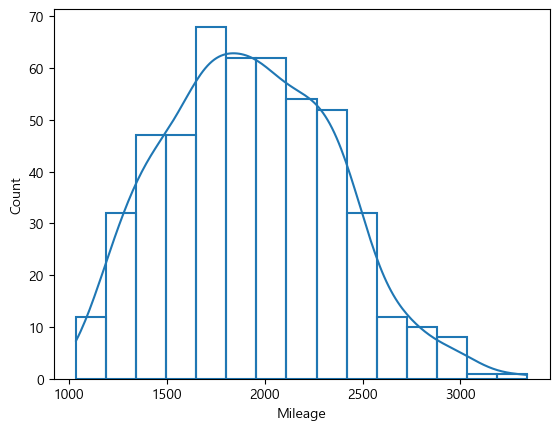

In [13]:
sns.histplot(data=df_TOCC_dropna, x='Mileage', kde=True, fill=False)

In [16]:
stats.shapiro(df_TOCC_dropna['Mileage'])

ShapiroResult(statistic=0.987966001033783, pvalue=0.000388040003599599)

### 선정 변수 : age, Mileage
    - 분석 내용 : 나이에 따라서 마일리지 변화가 있을는가 ?
귀무가설 : 나이에 따라서 마일리지 변화가 없다.
대립가설 : 나이에 따라서 마일리지 변화가 있다.
분석 결론 (기준 : p-value 0.05)
통계 결론 : 대립가설 참.
사실 결론 : 나이에 따라서 마일리지 올라간다.(0.97, pvalue=0.0)

In [17]:
df_TOCC[['type_of_contract', 'cancellation']].describe()

,type_of_contract,cancellation
count,51300,51279
unique,2,2
top,렌탈,정상
freq,46481,50372


In [18]:
df_TOCC_category = df_TOCC[['type_of_contract', 'cancellation']]

In [19]:
df_TOCC_category_pivot = pd.pivot_table(data=df_TOCC_category
               , index='type_of_contract', columns='cancellation'
               , aggfunc=len)
df_TOCC_category_pivot

cancellation,정상,해약
type_of_contract,,
렌탈,46137,344
멤버십,4231,563
